In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 85kB/s 
     |████████████████████████████████| 3.1MB 47.7MB/s 
     |████████████████████████████████| 501kB 51.2MB/s 
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow~=2.1.0, but you'll have tensorflow 2.0.0b1 which is incompatible.
ERROR: tensorflow-federated 0.12.0 has requirement tensorflow-addons~=0.7.0, but you'll have tensorflow-addons 0.8.3 which is incompatible.


In [36]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta1


In [0]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


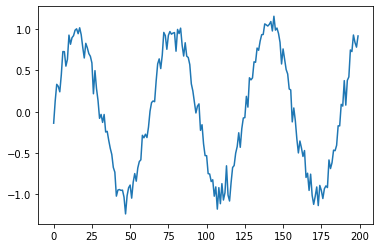

In [37]:
# make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [38]:
### build the dataset
# let's see if we can use T past values to predict the next value

T = 10
X = []
Y = []

for t in range(len(series) -  T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)

print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [39]:
### try autoregressive linear model
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i, x)
model.compile(
    loss = 'mse',
    optimizer = Adam(lr=0.1),
)

# train the RNN
r = model.fit(
    
    X[:-N//2], Y[:-N//2],
    epochs = 80,
    validation_data=(X[-N//2:], Y[-N//2:]), 
)

Train on 95 samples, validate on 95 samples
Epoch 1/80
95/95 [==============================] - 0s 802us/sample - loss: 0.4956 - val_loss: 0.4381
Epoch 2/80
95/95 [==============================] - 0s 92us/sample - loss: 0.4327 - val_loss: 0.1189
Epoch 3/80
95/95 [==============================] - 0s 91us/sample - loss: 0.1030 - val_loss: 0.2117
Epoch 4/80
95/95 [==============================] - 0s 85us/sample - loss: 0.1962 - val_loss: 0.0949
Epoch 5/80
95/95 [==============================] - 0s 91us/sample - loss: 0.0481 - val_loss: 0.0914
Epoch 6/80
95/95 [==============================] - 0s 99us/sample - loss: 0.1028 - val_loss: 0.1293
Epoch 7/80
95/95 [==============================] - 0s 88us/sample - loss: 0.0721 - val_loss: 0.0417
Epoch 8/80
95/95 [==============================] - 0s 95us/sample - loss: 0.0601 - val_loss: 0.0835
Epoch 9/80
95/95 [==============================] - 0s 94us/sample - loss: 0.0608 - val_loss: 0.0362
Epoch 10/80
95/95 [===========================

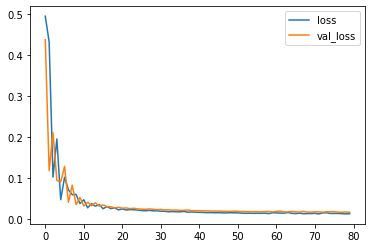

In [40]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()


In [0]:
# "Wrong" forecast using true targets

validation_target = Y[-N//2:]
validation_predictions = []

# index of first validation input 
i = -N//2

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1, -1))[0, 0] # 1x1 array -> scalar
  i += 1

  # update the predictions list
  validation_predictions.append(p)

  

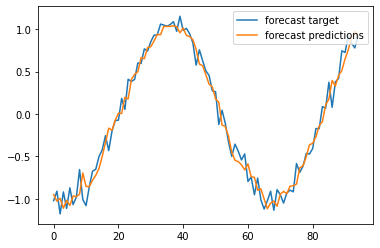

In [42]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()

# make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p 

In [0]:
# For future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2] # 1-D array of length

while len(validation_predictions) <  len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0, 0] # 1x1 array -> scalar

  # update the predictions list
  validation_predictions.append(p)

  # make the new input 
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

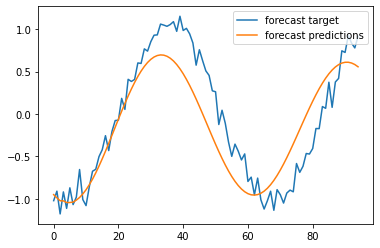

In [44]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast predictions')
plt.legend()

In [0]:
array = np.arange(8) 

In [17]:
array

array([0, 1, 2, 3, 4, 5, 6, 7])

In [31]:
array.reshape(-1, 4)

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [32]:
X

array([[ 0.        ,  0.09983342,  0.19866933, ...,  0.64421769,
         0.71735609,  0.78332691],
       [ 0.09983342,  0.19866933,  0.29552021, ...,  0.71735609,
         0.78332691,  0.84147098],
       [ 0.19866933,  0.29552021,  0.38941834, ...,  0.78332691,
         0.84147098,  0.89120736],
       ...,
       [-0.14899903, -0.04953564,  0.05042269, ...,  0.52306577,
         0.60553987,  0.68196362],
       [-0.04953564,  0.05042269,  0.14987721, ...,  0.60553987,
         0.68196362,  0.75157342],
       [ 0.05042269,  0.14987721,  0.24783421, ...,  0.68196362,
         0.75157342,  0.81367374]])

In [35]:
len(validation_predictions)

95